In [ ]:
!pip install brian2

In [ ]:
!pip install librosa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import brian2 as b2
import os
import librosa
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
!pip install matplotlib

In [ ]:
eqs1 = '''
  dx/dt = b*x - w*y : 1
  dy/dt = w*x + b*y + I_input(t) : 1
  b: Hz
  w: Hz
  '''

def find_freaq(X,Y):
  b2.start_scope()
  I = Y
  N=6

  I_input = b2.TimedArray(I*b2.kHz/100,dt = 1*b2.ms)

  G = b2.NeuronGroup(N, eqs1, threshold = 'y > 5', reset = '''y=1\n x=0''', method = 'exact')
  G.b = -1*b2.Hz
  freaqun= [2*np.pi/100,2*np.pi/200,2*np.pi/300,2*np.pi/400,2*np.pi/600, 2*np.pi/2000]
  G.w =freaqun*1/b2.ms

  mon = b2.StateMonitor(G, ['x', 'y'], record=True, dt = 0.1*b2.ms)
  spikes_mon = b2.SpikeMonitor(G, record = True)
  t_max = 2500 * b2.ms
  b2.run(t_max)

  plt.figure(figsize = (10, 3))
  plt.plot(X,Y, label = 'Input', c = 'g')
  plt.legend()
  plt.show()

  plt.figure(figsize = (10, 3))
  color = ['yellow','blue']
  for i in range(N):
      plt.plot(mon.t / b2.ms, mon.x[i].T, label = f'{int(freaqun[i]*1000)} neuron')
  plt.legend()
  plt.show()
  plt.figure(figsize = (10, 3))
  color = ['yellow','blue']
  for i in range(N):
      plt.plot(mon.t / b2.ms, mon.y[i].T, label = f'{int(freaqun[i]*1000)} neuron')
  plt.legend()
  plt.show()

  maximum=0
  for i in range(N):
    if(mon.x[i].max()>maximum):
      maximum=mon.x[i].max()
  if(maximum<0.2):
    return
  answer=np.array([])
  for i in range(N):
    m1=mon.x[i,1000:].max()
    mar2=mon.x[i,1000:]
    mar2=np.delete(mar2, np.where(mar2==m1))
    m2=mar2.max()
    mar3=mar2
    mar3=np.delete(mar3,np.where(mon.x[i,1000:]==m2))
    m3=mar3.max()
    m=(m1*m2*m3)**(1/3)

    answer=np.append(answer,m1)

  answer=answer/answer.sum()
  for i in range(N):
    print(G.w[i], 'with amplitude ', answer[i])

  # for i in range(N):
  #   if(mon.x[i].max()>maximum*0.7):#-min((freaqun[i]*1000/20),2) ):
  #     print(G.w[i])

  plt.figure(figsize = (10, 3))
  for i in range(N):
    plt.scatter(freaqun[i]*1000,answer[i])
  plt.legend()
  plt.show()
  return answer



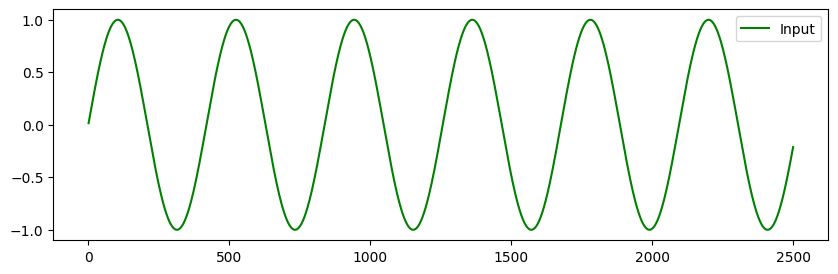

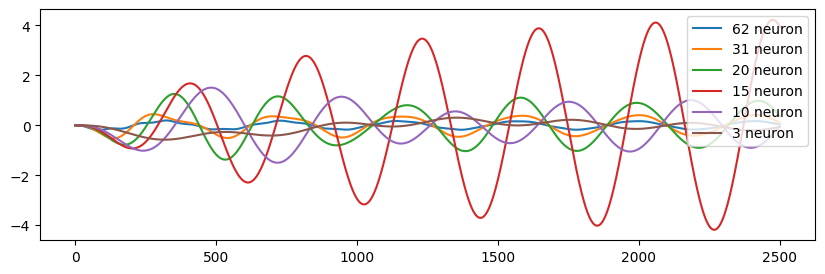

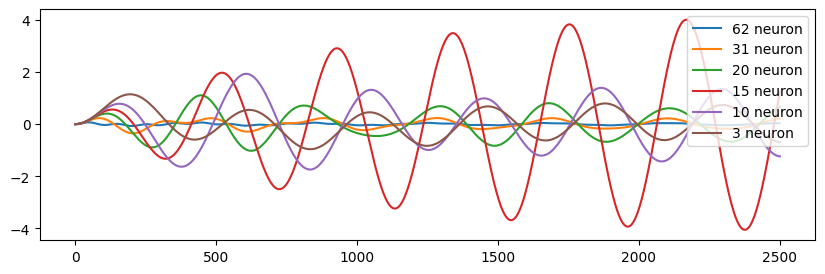

62.83185307 Hz with amplitude  0.00010018542752420701
31.41592654 Hz with amplitude  0.001190206823789295
20.94395102 Hz with amplitude  0.02643233405581366
15.70796327 Hz with amplitude  1.0
10.47197551 Hz with amplitude  0.04560747318743903
3.14159265 Hz with amplitude  0.000387766529563514


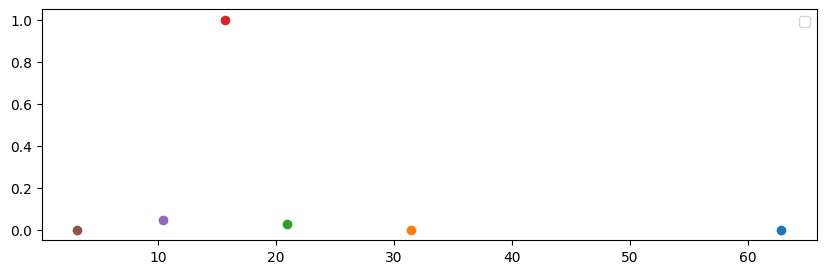

In [ ]:
X = np.arange(1,2500,1)
X= X.astype('double')
Y=np.sin(np.full(X.shape[0],15)*(X)/1000)
find_freaq(X,Y)

Exception ignored in: <bound method InstanceTrackerSet.remove of InstanceTrackerSet({<weakref at 0x7c38a58572e0; to 'MagicNetwork' at 0x7c38a57fd840>, <weakref at 0x7c38890eaac0; to 'StateMonitor' at 0x7c388d3720b0>, <weakref at 0x7c38892bd9e0; to 'CythonCodeObject' at 0x7c38896930d0>, <weakref at 0x7c388927aed0; to 'StateUpdater' at 0x7c388d372920>, <weakref at 0x7c38890eb3d0; to 'Resetter' at 0x7c388d370d60>, <weakref at 0x7c38892bf6a0; to 'CythonCodeObject' at 0x7c3889692da0>, <weakref at 0x7c38892bf330; to 'CythonCodeObject' at 0x7c38896909d0>, <weakref at 0x7c388de6e4d0; to 'CythonCodeObject' at 0x7c388904dde0>, <weakref at 0x7c38890ca390; to 'TimedArray' at 0x7c388d371e10>, <weakref at 0x7c38890e8b80; to 'Clock' at 0x7c388d371e70>, <weakref at 0x7c38890ea2a0; to 'Thresholder' at 0x7c388d372e90>, <weakref at 0x7c38892bc950; to 'SpikeMonitor' at 0x7c388d3726b0>, <weakref at 0x7c38890e9210; to 'NeuronGroup' at 0x7c388d3702e0>, <weakref at 0x7c38a58c7790; to 'Clock' at 0x7c38a62ef790

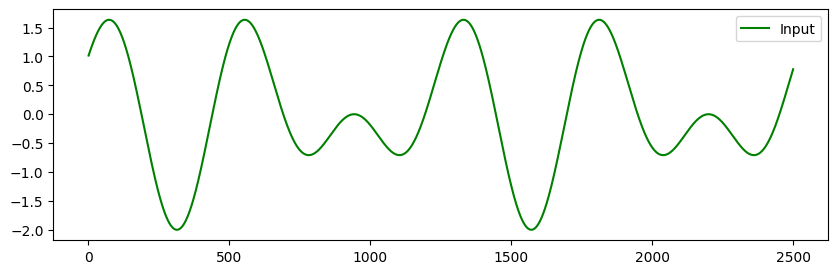

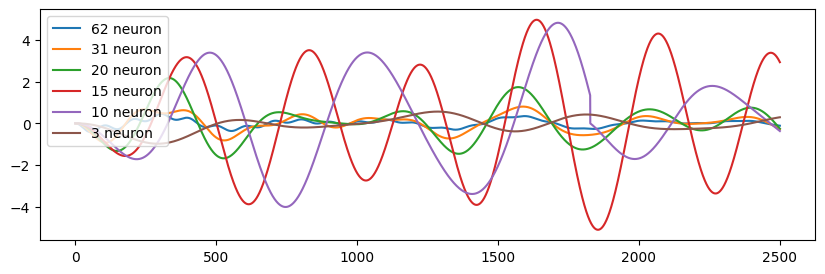

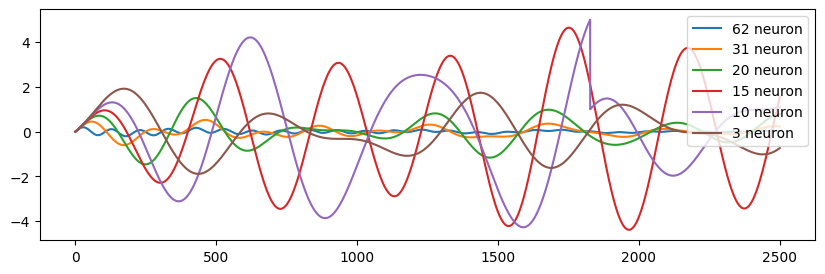

62.83185307 Hz with amplitude  0.03302256664459897
31.41592654 Hz with amplitude  0.05817107887930094
20.94395102 Hz with amplitude  0.15762519706265707
15.70796327 Hz with amplitude  0.36043413671010266
10.47197551 Hz with amplitude  0.349972480023025
3.14159265 Hz with amplitude  0.040774540680315385


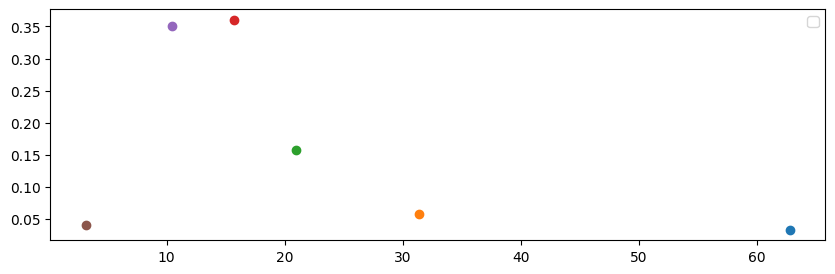

array([0.03302257, 0.05817108, 0.1576252 , 0.36043414, 0.34997248,
       0.04077454])

In [ ]:
Y=np.cos(np.full(X.shape[0],10)*X/1000)+np.sin(np.full(X.shape[0],15)*(X)/1000)
find_freaq(X,Y)

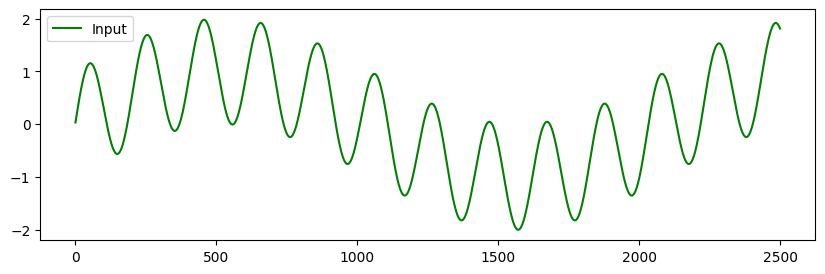

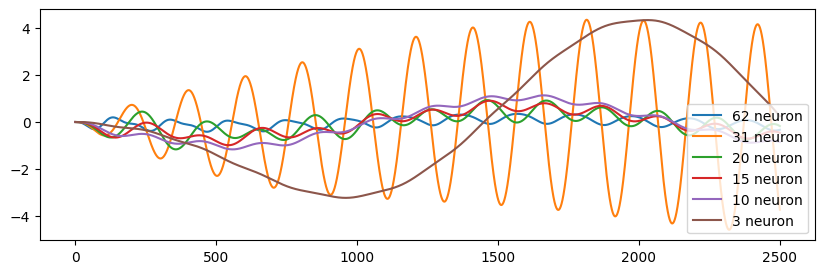

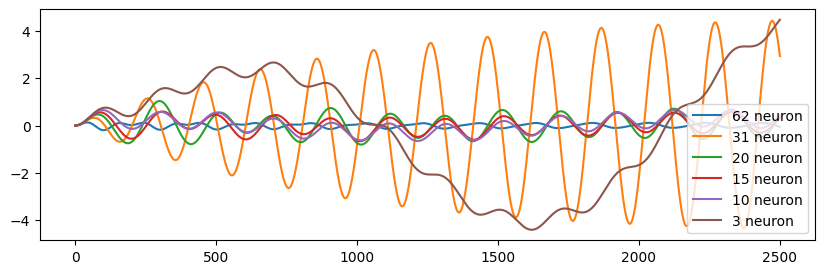

62.83185307 Hz with amplitude  0.0005087946339542645
31.41592654 Hz with amplitude  1.0
20.94395102 Hz with amplitude  0.009780534181111387
15.70796327 Hz with amplitude  0.00904175976927416
10.47197551 Hz with amplitude  0.017731472845344345
3.14159265 Hz with amplitude  0.9910184769547252


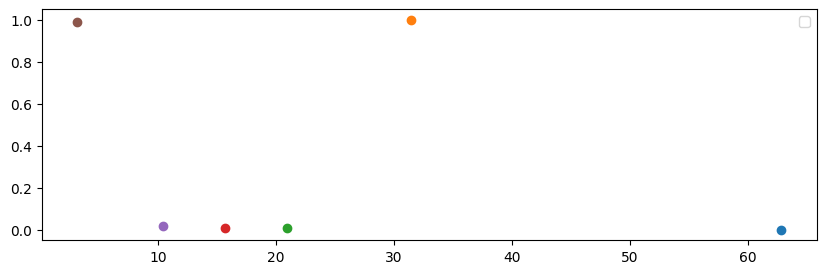

In [ ]:
Y=np.sin(np.full(X.shape[0],3)*X/1000)+np.sin(np.full(X.shape[0],31)*(X)/1000)
find_freaq(X,Y)

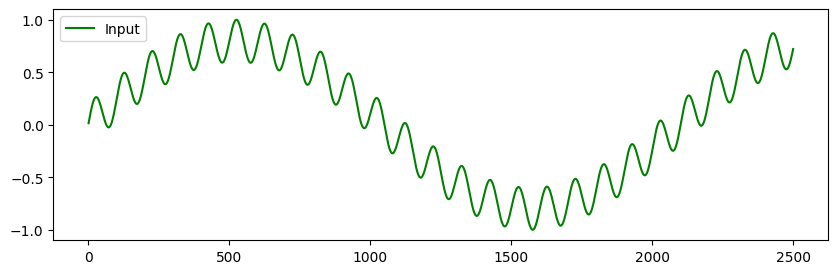

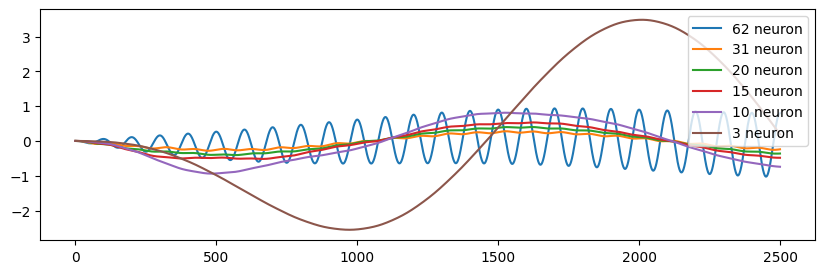

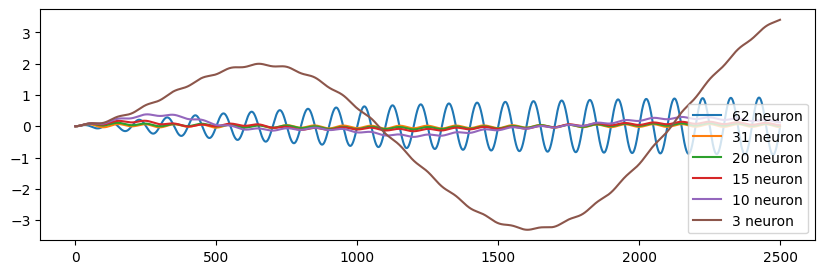

62.83185307 Hz with amplitude  0.14522010418501966
31.41592654 Hz with amplitude  0.04326306958185969
20.94395102 Hz with amplitude  0.06211453617803638
15.70796327 Hz with amplitude  0.0826266248025425
10.47197551 Hz with amplitude  0.12596608580675725
3.14159265 Hz with amplitude  0.5408095794457846


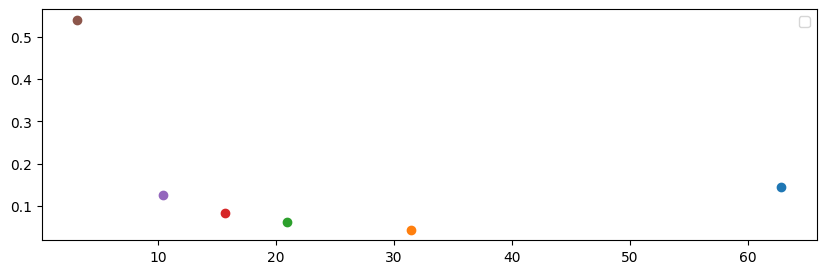

In [ ]:
Y=0.8*np.sin(np.full(X.shape[0],3)*X/1000)+0.2*np.sin(np.full(X.shape[0],62.8)*(X)/1000)
find_freaq(X,Y)

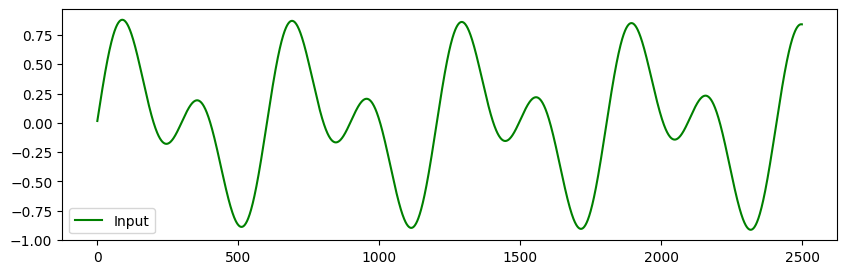

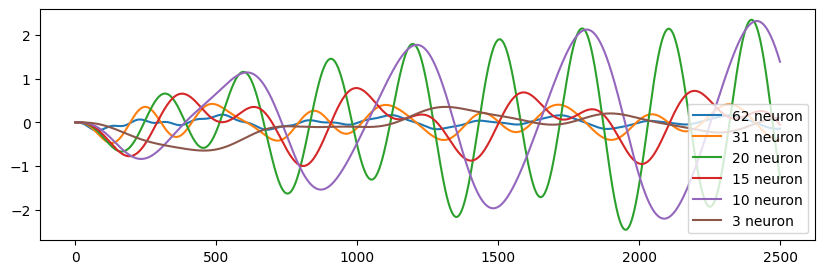

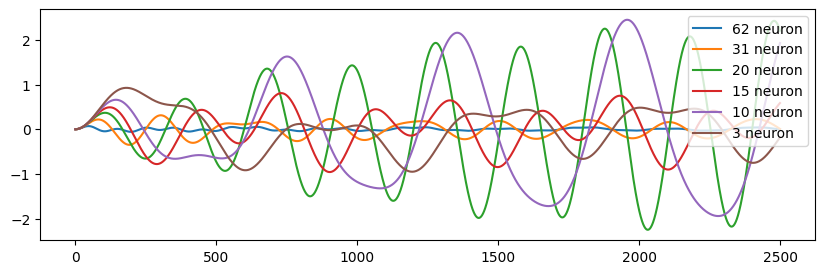

62.83185307 Hz with amplitude  0.027533080635766885
31.41592654 Hz with amplitude  0.0659986933596385
20.94395102 Hz with amplitude  0.36648255892739257
15.70796327 Hz with amplitude  0.12258833254160006
10.47197551 Hz with amplitude  0.3620908221999807
3.14159265 Hz with amplitude  0.05530651233562134


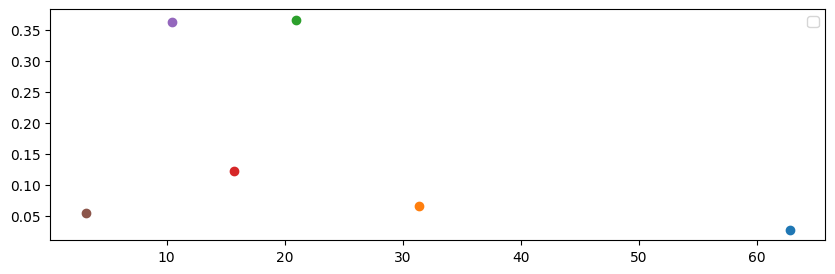

In [ ]:
Y=0.5*np.sin(np.full(X.shape[0],10.4)*X/1000)+0.5*np.sin(np.full(X.shape[0],20.9)*(X)/1000)
find_freaq(X,Y)

In [ ]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

X = np.arange(1,250,0.1)
X= X.astype('double')
Y=np.sin(2*np.pi*X)+np.sin(2*np.pi*X/3)+np.sin(2*np.pi*X/2)

# Выполняем быстрое преобразование Фурье (FFT)
Y_fft = fft(Y)

# Находим частоты, соответствующие спектру
freq = fftfreq(len(X), d=X[1]-X[0])  # d - шаг по времени

#peaks = np.where(np.abs(Y_fft) > 0.7 * np.max(np.abs(Y_fft)))
peaks, _ = find_peaks(np.abs(Y_fft), height=0.5)
peaks=peaks[freq[peaks]>=0]

# Частоты и амплитуды сигнала
frequencies = freq[peaks]

amplitudes = 2*np.abs(Y_fft[peaks]) / len(X)


print("Частоты:")
print(frequencies)
print("Амплитуды:")
print(amplitudes)

Частоты:
[0.33333333 0.49799197 1.        ]
Амплитуды:
[0.99207612 0.63785836 1.00000153]


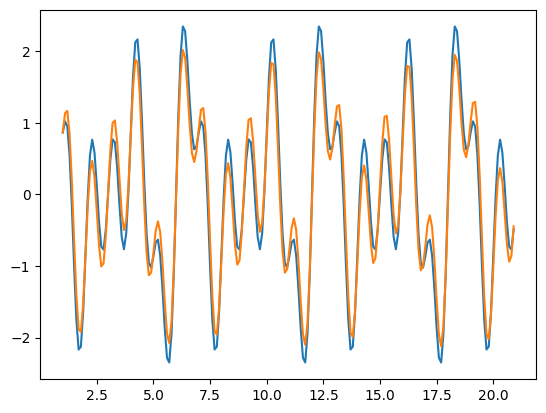

In [ ]:
y_pred=X*0
for i in range(len(amplitudes)):
  y_pred=y_pred+amplitudes[i]*np.sin(X*frequencies[i]*2*np.pi)

MSE=np.sum((Y-y_pred)**2)/len(X)
print(MSE)
plt.plot(X[:200],Y[:200])
plt.plot(X[:200],y_pred[:200])
plt.show()

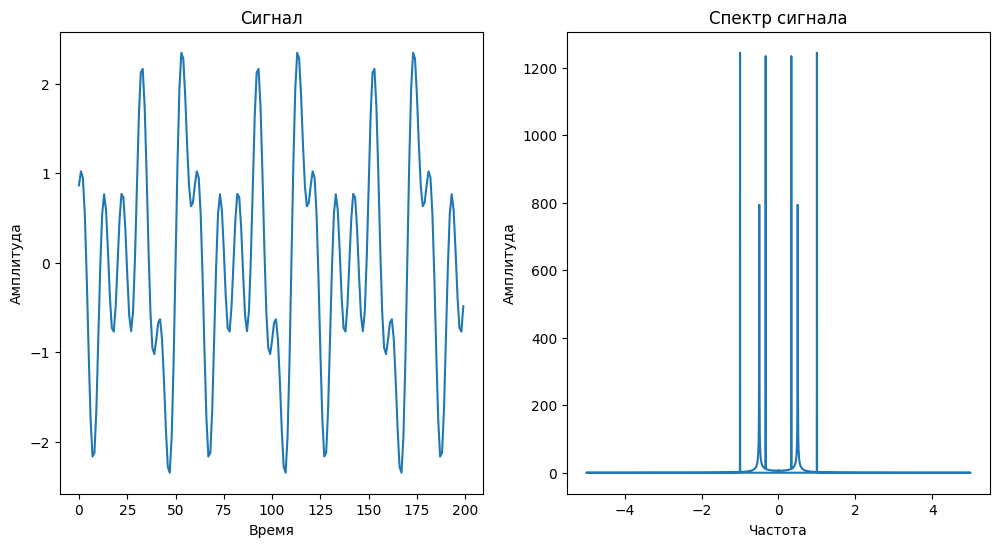

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(Y[:200])
plt.title("Сигнал")
plt.xlabel("Время")
plt.ylabel("Амплитуда")

plt.subplot(122)
plt.plot(freq, np.abs(Y_fft))
plt.title("Спектр сигнала")
plt.xlabel("Частота")
plt.ylabel("Амплитуда")
plt.show()

In [39]:
!pip install librosa

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install numpy==2.0.0

In [2]:


path_to_wav_files = '\\Users\\Alex\\Downloads\\archive\\free-spoken-digit-dataset-master\\recordings'
labels=np.array([])
audio_arrays=[]
i=1
for filename in os.listdir(path_to_wav_files):
    if filename.endswith(".wav"):
        file_path = os.path.join(path_to_wav_files, filename)
        audio, sr = librosa.load(file_path)
        if(i):
            time = np.arange(len(audio)) / sr  # создаем массив времени
            i=0
        audio_arrays.append(audio)
        label = filename.split("_")[0]
        labels=np.append(labels,label)

print(time[1]) #частота дискретизации в Hz

4.5351473922902495e-05


In [5]:
print(sr)

22050


In [5]:
df=pd.DataFrame({'audio':audio_arrays,'label':labels})
#df.to_csv('train',index=False)

In [4]:
df.head()

,audio,label
0,"[-0.042299885, -0.04891741, -0.037658095, -0.0...",0
1,"[0.0009936994, 0.0009981513, 0.0006465188, 0.0...",0
2,"[-0.0065615834, -0.014036996, -0.017166939, -0...",0
3,"[0.0029849287, 0.0039212042, 0.0039759455, 0.0...",0
4,"[0.0019448531, 0.002686485, 0.0027709352, 0.00...",0


In [5]:
df.tail()

,audio,label
2995,"[-0.00012165085, -0.00030785246, -0.0004126798...",9
2996,"[-0.00017898544, -9.12726e-05, 0.00013326082, ...",9
2997,"[0.00022463911, 0.0002200068, 0.0001262771, 9....",9
2998,"[0.00032725645, 0.00030158227, 0.00016143348, ...",9
2999,"[-8.110175e-05, -0.00018237269, -0.00024975007...",9


(4504,)

In [6]:
from sklearn.model_selection import train_test_split

dfx, dfx_test, y_train, y_test = train_test_split(df['audio'], df['label'], test_size=0.2, shuffle=True)

In [110]:
#0.1  0.8
from sklearn.model_selection import train_test_split

df0=df[(df['label']=='0') | (df['label']=='1')]
df0.shape
df0=df0.reset_index(drop=True)

df0x, df0x_test, y0_train, y0_test = train_test_split(df0['audio'], df0['label'], test_size=0.9, shuffle=True)
df0x_test=df0x_test[:20]
y0_test=y0_test[:20]
print(df0x)
print(y0_train)

79     [0.008316027, 0.010765041, 0.010772016, 0.0111...
524    [6.450812e-05, 0.00022114339, 0.0004112349, 0....
325    [0.038447738, 0.0630751, 0.07358591, 0.0724644...
228    [0.0006098389, 0.000739425, 0.00063535693, 0.0...
164    [-0.0064187893, -0.008576229, -0.008842887, -0...
492    [-0.0010192884, -0.0019444226, -0.0009837928, ...
288    [0.00020029128, 0.0002565764, 0.00022449956, 0...
3      [0.0029849287, 0.0039212042, 0.0039759455, 0.0...
570    [-0.00018112981, -0.0002877849, -0.0003428235,...
149    [-0.0032746822, -0.002528721, 0.0023455531, 0....
118    [0.00039716417, 0.0005038101, 0.00047754517, 0...
170    [-0.013253017, -0.014507777, -0.010867408, -0....
81     [0.008849997, 0.011855373, 0.0120052565, 0.012...
172    [2.2201275e-05, 0.003186239, 0.006900602, 0.00...
55     [0.010163058, 0.013294987, 0.013216899, 0.0138...
443    [-0.0002805575, -0.00025009474, 3.6174868e-05,...
598    [0.0004298586, 0.00048782973, 0.0003814451, 0....
139    [-0.0005552415, -0.00069

In [6]:

for i in range(60):
    #print(df0x[i])
    df0x[i]=(df0x[i]-np.mean(df0x[i]))/np.std(df0x[i])
df0x_test=df0x_test.reset_index(drop=True)
for i in range(len(df0x_test)):
   
    df0x_test[i]=(df0x_test[i]-np.mean(df0x_test[i]))/np.std(df0x_test[i])

WARNING    The object 'neurongroup_2' is getting deleted, but was never included in a network. This probably means that you did not store the object reference in a variable, or that the variable was not used to construct the network.
The object was created here (most recent call only):
  File 'C:\Users\Alex\AppData\Local\Temp\ipykernel_9448\1041251940.py', line 41, in create_input
    G = b2.NeuronGroup(N, eqs1, threshold = 'x >0.001', reset='v = vr', method = 'euler', namespace={'I_input(t)': I_input})# [brian2.core.base.unused_brian_object]
WARNING    The object 'neurongroup_3' is getting deleted, but was never included in a network. This probably means that you did not store the object reference in a variable, or that the variable was not used to construct the network.
The object was created here (most recent call only):
  File 'C:\Users\Alex\AppData\Local\Temp\ipykernel_9448\1164679712.py', line 42, in create_input
    G = b2.NeuronGroup(N, eqs1, threshold = 'x >0.001', reset='v = 

[[0.46018578 0.30378056 0.08509743 ... 0.24243599 0.48459698 0.27279496]
 [0.46018578 0.30378056 0.08509743 ... 0.24243599 0.48459698 0.27279496]
 [0.46018578 0.30378056 0.08509743 ... 0.24243599 0.48459698 0.27279496]
 ...
 [0.46018578 0.30378056 0.08509743 ... 0.5        0.5        0.5       ]
 [0.46018578 0.30378056 0.08509743 ... 0.5        0.5        0.5       ]
 [0.46018578 0.30378056 0.08509743 ... 0.5        0.5        0.5       ]]
train finish
[[0.46018578 0.30378056 0.08509743 ... 0.24243599 0.48459698 0.27279496]
 [0.46018578 0.30378056 0.08509743 ... 0.24243599 0.48459698 0.27279496]
 [0.46018578 0.30378056 0.08509743 ... 0.24243599 0.48459698 0.27279496]
 ...
 [0.46018578 0.30378056 0.08509743 ... 0.5        0.5        0.5       ]
 [0.46018578 0.30378056 0.08509743 ... 0.5        0.5        0.5       ]
 [0.46018578 0.30378056 0.08509743 ... 0.5        0.5        0.5       ]]


WARNING    (string):18: RuntimeWarning: overflow encountered in multiply
 [py.warnings]
WARNING    (string):18: RuntimeWarning: invalid value encountered in subtract
 [py.warnings]
WARNING    (string):19: RuntimeWarning: overflow encountered in multiply
 [py.warnings]
WARNING    (string):19: RuntimeWarning: invalid value encountered in add
 [py.warnings]
WARNING    (string):19: RuntimeWarning: overflow encountered in multiply
 [py.warnings]
WARNING    (string):19: RuntimeWarning: invalid value encountered in add
 [py.warnings]
WARNING    (string):19: RuntimeWarning: overflow encountered in multiply
 [py.warnings]
WARNING    (string):19: RuntimeWarning: invalid value encountered in add
 [py.warnings]


[[133. 121.]
 [182. 172.]
 [182. 174.]
 [183. 183.]
 [129. 154.]
 [140. 128.]
 [137. 143.]
 [131. 125.]
 [125. 159.]
 [154. 153.]
 [164. 156.]
 [147. 146.]
 [142. 141.]
 [138. 150.]
 [145. 156.]
 [169. 132.]
 [125. 174.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [125. 125.]
 [124. 124.]
 [122. 122.]
 [122. 122.]
 [123. 123.]
 [120. 122.]
 [121. 121.]
 [120. 120.]
 [123. 124.]
 [124. 124.]
 [124. 124.]
 [123. 123.]
 [122. 122.]
 [123. 124.]
 [121. 121.]
 [124. 124.]
 [122. 122.]
 [122. 122.]
 [119. 120.]
 [122. 122.]
 [124. 124.]
 [122. 123.]
 [123. 123.]
 [123. 123.]
 [123. 123.]
 [102. 102.]]
[[3434. 3515.]
 [4380. 4346.]]
[1 0]
Accuracy: 0.6166666666666667


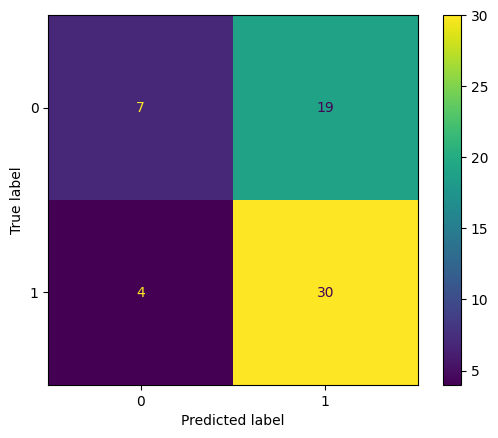

In [108]:
##STDP
# taum = 10*b2.ms
# taue = 5*b2.ms
# taui = 10*b2.ms
# v_rest = -20*b2.mV
# vt = -40*b2.mV
# vr = -60*b2.mV
# Ee = 0*b2.mV
# Ei = -50*b2.mV

# taum = 7*b2.ms
# taue = 5*b2.ms
# taui = 7*b2.ms
# v_rest = -20*b2.mV
# vt = -20*b2.mV
# vr = -40*b2.mV
# Ee = 0.01*b2.mV
# Ei = -30*b2.mV

dtd=time[1]*b2.second
taum = 7.9*b2.ms
taue = 7.9*b2.ms
taui = 7.9*b2.ms
v_rest = -8*b2.mV
vt = -10*b2.mV
vr = -40*b2.mV
Ee = 0.1*b2.mV
Ei = -15*b2.mV



def create_input(Y):
  eqs1 = '''
  dx/dt = b*x - w*y : 1
  dy/dt = w*x + b*y + I_input(t) : 1
  b: Hz
  w: Hz
  val: Hz
  '''
  N=30
  I_input = b2.TimedArray(Y.astype(np.float64)*b2.Hz,dt = dtd) 
  G = b2.NeuronGroup(N, eqs1, threshold = 'x > 0.02', reset='v = vr', method = 'euler', namespace={'I_input': I_input})
  G.add_attribute('I_input')
  G.b = -1*b2.Hz
  mon = b2.StateMonitor(G, ['x', 'y'], record=True, dt = dtd*0.5)
  freaqun=np.linspace(20,8000,num=30)
  G.w =freaqun*1/b2.second
  s_mon_inp = b2.SpikeMonitor(G)
  return G, s_mon_inp,mon


def create_exc_neurons():
  neuron_eq = '''
            dv/dt = (v_rest - v + ge * (Ee - v) + gi * (Ei - v)) / taum : volt
            dge/dt = -ge / taue : 1
            dgi/dt = -gi / taui : 1
            '''
  neurons = b2.NeuronGroup(2, neuron_eq, threshold='v>vt', reset='v = vr',method='euler')
  neurons.v = v_rest
  neurons.ge=0.01
  neurons.gi=0.01
  s_mon_nrn = b2.SpikeMonitor(neurons)
  return neurons, s_mon_nrn


taupre=3*b2.ms
taupost=3*b2.ms
gmax=0.5
gi_max = gmax
max_delay_i = 10*b2.ms
dApre=0.01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax

def create_stdp_synapses(pre_group, post_group):
  S = b2.Synapses(pre_group, post_group,
             '''ws : 1 
                stdp_rate : 1 (shared)
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
             on_pre='''ge += ws
                    Apre += dApre
                    ws = clip(ws + stdp_rate*Apost, 0, gmax)''',
             on_post='''Apost += dApost
                     ws = clip(ws + stdp_rate*Apre, 0, gmax)''',
             )
  S.connect()
  S.ws = 'rand()*gmax'
  S.stdp_rate = 1
  mon = b2.StateMonitor(S, 'ws', record=True)
  return S, mon

def create_inh_synapses(neuron_group):
  S = b2.Synapses(neuron_group, neuron_group,
             '''wss : 1
                ''',
             on_pre='''gi -= 0.7*wss''',
             )
  S.connect('i!=j')
  S.delay = "max_delay_i*rand()"
  S.wss = gi_max
  return S

def train(X):
  T_img = 20*b2.ms
  T_rest = 5*b2.ms
  for audio in X:
    input_layer.I_input=b2.TimedArray(audio.astype(np.float64)*b2.Hz,dt = dtd)
    b2.run(T_img, report=None)
    input_layer.I_input=b2.TimedArray(np.zeros(len(audio)).astype(np.float64)*b2.Hz,dt = dtd)
    b2.run(T_rest, report=None)
  b2.store() 
  pass
    
def evaluate(X):
  #print(mon_stdp.ws.T)
  b2.restore()
  print(mon_stdp.ws.T)
  img_rates = np.zeros((len(X), len(exc_layer)))
  T_show = 20*b2.ms
  T_rest = 5*b2.ms
  rate_mon = b2.SpikeMonitor(exc_layer)
  prev_count = np.zeros((len(exc_layer),))
  for i_img, img in enumerate(X):
    input_layer.I_input=b2.TimedArray(img.astype(np.float64)*b2.Hz,dt = dtd)
    b2.run(T_show, report=None)
    img_rates[i_img,:] = np.array(rate_mon.count-prev_count)
    prev_count += img_rates[i_img,:]
    input_layer.I_input=b2.TimedArray(np.zeros(len(img)).astype(np.float64)*b2.Hz,dt = dtd)
    b2.run(T_rest, report=None)
  return img_rates
    
def predict(rates, neuron_class):
  y = np.ones(rates.shape[0])*np.nan
  for i,x in enumerate(rates):
    y[i] = neuron_class[np.argmax(x)]
  return y


b2.start_scope()
input_layer, mon_input,mons = create_input(df0['audio'][0])
exc_layer, mon_exc = create_exc_neurons()
stdp_synapses, mon_stdp = create_stdp_synapses(input_layer, exc_layer)
inh_synapses = create_inh_synapses(exc_layer)
b2.run(0*b2.ms)
b2.store()
b2.restore()
    
stdp_synapses.stdp_rate = 1
train(df0x)
#print(mon_stdp.ws.T)
b2.store()
print(mon_stdp.ws.T)
print('train finish')

stdp_synapses.stdp_rate = 0.05
train_rates = evaluate(df0x)
print(train_rates)

nrn_class_count = np.zeros((2,len(exc_layer)))
for i_class in range(2):
  nrn_class_count[i_class,:] = np.sum(train_rates[np.equal(y0_train.astype(int),i_class),:], axis=0)
print(nrn_class_count)
nrn_class_count[0]=nrn_class_count[0]-np.mean(nrn_class_count[0])+1
nrn_class_count[1]=nrn_class_count[1]-np.mean(nrn_class_count[1])+1
neuron_class = np.argmax(nrn_class_count, axis=0)

print(neuron_class)
#test_rates = evaluate(df0x_test)

train_prediction = predict(train_rates, neuron_class)
acc = accuracy_score(y0_train.astype(float), train_prediction)
cm = confusion_matrix(y0_train.astype(float), train_prediction)
print(f"Accuracy: {acc}")
cm_display = ConfusionMatrixDisplay(cm).plot()

# test_prediction = predict(test_rates, neuron_class)

# print(test_prediction)
# print(y0_test)
# acc = accuracy_score(y0_test.astype(float), test_prediction)
# cm = confusion_matrix(y0_test.astype(float), test_prediction)
# print(f"Accuracy: {acc}")
# cm_display = ConfusionMatrixDisplay(cm).plot()

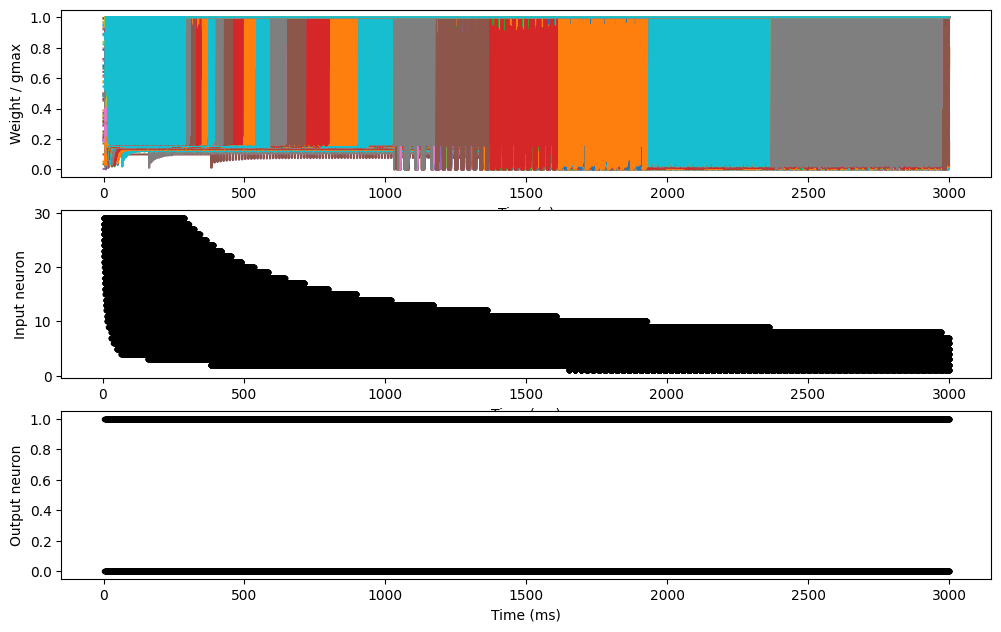

In [109]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(mon_stdp.t/b2.ms, mon_stdp.ws.T/gmax)
plt.xlabel('Time (s)')
plt.ylabel('Weight / gmax')
plt.subplot(412)
plt.plot(mon_input.t/b2.ms, mon_input.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Input neuron')
#plt.yticks(range(0,len(input_rates)))
plt.subplot(413)
plt.plot(mon_exc.t/b2.ms, mon_exc.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Output neuron')
#plt.tight_layout()
plt.show()
#plot_synapses(input_layer.N, exc_layer.N, stdp_synapses, "STDP weights")

In [9]:
##RL
dtd=time[1]*b2.second
y0_train=np.array(y0_train)

taum = 7*b2.ms
taue = 7*b2.ms
taui = 7*b2.ms
v_rest = -8*b2.mV
vt = -5*b2.mV
vr = -40*b2.mV
Ee = 0.1*b2.mV
Ei = -15*b2.mV

## Dopamine signaling
tauc = 10*b2.ms
taud = 20*b2.ms
taus = 1*b2.ms
epsilon_dopa = 0.019

def create_input(Y):
  eqs1 = '''
  dx/dt = b*x - w*y : 1
  dy/dt = w*x + b*y + I_input(t) : 1
  b: Hz
  w: Hz
  val: Hz
  '''

  N=30
  I_input = b2.TimedArray(values=Y*b2.Hz,dt = dtd)
  G = b2.NeuronGroup(N, eqs1, threshold = 'x > 0.02', reset='v = vr', method = 'euler', namespace={'I_input': I_input})
  G.add_attribute('I_input')
  G.b = -1*b2.Hz
  mon = b2.StateMonitor(G, ['x', 'y'], record=True, dt = dtd)
  freaqun=np.linspace(20,8000,num=30)
  G.w =freaqun*1/b2.second
  s_mon_inp = b2.SpikeMonitor(G)
  return G, s_mon_inp,mon



def create_exc_neurons():
  neuron_eq = '''
            dv/dt = (v_rest - v + ge * (Ee - v) + gi * (Ei - v)) / taum : volt
            dge/dt = -ge / taue : 1
            dgi/dt = -gi / taui : 1
            '''
  neurons = b2.NeuronGroup(1, neuron_eq, threshold='v>vt', reset='v = vr',
                      method='euler')
  neurons.v = v_rest
  neurons.ge=0.1
  neurons.gi=0.1
  s_mon_nrn = b2.SpikeMonitor(neurons)
  return neurons, s_mon_nrn



taupre=20*b2.ms
taupost=20*b2.ms
gmax=0.3
gi_max = gmax
max_delay_i = 1*b2.ms
dApre=0.01
dApost = -dApre * taupre / taupost * 1.05
dApost *= gmax
dApre *= gmax


def create_da_stdp_synapses1(pre_group, post_group):
    synapse_stdp = b2.Synapses(pre_group, post_group,
                       model='''
                             dc/dt = -c / tauc : 1 (clock-driven)
                             dd/dt = -d / taud : 1 (clock-driven)
                             ds/dt = c * d / taus : 1 (clock-driven)
                             dApre/dt = -Apre / taupre : 1 (event-driven)
                             dApost/dt = -Apost / taupost : 1 (event-driven)''',
                       on_pre='''ge += s
                              Apre += dApre
                              c = clip(c +  Apost, -gmax, gmax)
                              s = clip(s , -gmax, gmax)
                              ''',
                       on_post='''Apost += dApost
                              c = clip(c + Apre, -gmax, gmax)
                              s = clip(s , -gmax, gmax)
                              ''',
                       method='euler'
                       )
    synapse_stdp.connect()
    synapse_stdp.s = 0.01
    
    synapse_stdp.c = 0.01
    synapse_stdp.d = 0.01
    synapse_stdp_monitor = b2.StateMonitor(synapse_stdp, ['s', 'c', 'd'], record=[0])
    return synapse_stdp,synapse_stdp_monitor 


#dv/dt = -v / tauc 

def create_dopamine():
    dopamine_group = b2.NeuronGroup(1, model=
    '''
    dv2/dt = -v2 / tauc : 1
    ''', threshold='v2>0.9', reset='v2=0.1', method='euler')
    dopamine_group.v2 = 0.1
    mon = b2.StateMonitor(dopamine_group, 'v2', record=True, dt = dtd)
    return dopamine_group,mon


def reward_syn(dopamine, synapse_stdp):
    reward = b2.Synapses(dopamine, synapse_stdp, model='''''',
                                on_pre='''d_post += 0*epsilon_dopa''',
                                method='exact')
    reward.connect()
    return reward



def create_inh_synapses(neuron_group):
  S = b2.Synapses(neuron_group, neuron_group,
             '''wss : 1
                ''',
             on_pre='''gi += 0.3*wss''',
             )
  S.connect('i!=j')
  S.delay = 0.2*b2.ms
  S.wss = gi_max
  return S

def train(X):
  img_rates = np.zeros((len(X), 2))
  T_img = 20*b2.ms
  T_rest = 5*b2.ms
  rate_mon1 = b2.SpikeMonitor(exc_layer1)
  rate_mon2 = b2.SpikeMonitor(exc_layer2)
  prev_count1 = np.zeros(1,)
  prev_count2 = np.zeros(1,)
    
  dopamine_group1,mond1 = create_dopamine()
  dopamine_group2,mond2 = create_dopamine()
  reward_synapse1 = reward_syn(dopamine_group1, stdp_synapses1)
  reward_synapse2 = reward_syn(dopamine_group2, stdp_synapses2)
  net.add(reward_synapse1)
  net.add(reward_synapse2)
  net.add(dopamine_group1)
  net.add(dopamine_group2)
  net.add(rate_mon1)
  net.add(rate_mon2)
  net.add(mond1)
  net.add(mond2)
         
  for ind,audio in enumerate(X):
    input_layer.I_input=b2.TimedArray(audio*b2.Hz,dt = dtd)
    net.run(T_img,report=None)
    img_rates[ind,0] = np.array(rate_mon1.count-prev_count1)
    img_rates[ind,1] = np.array(rate_mon2.count-prev_count2)
    maxeps=0.9
    mineps=-0.048
    v_=0.3
    if((img_rates[ind,0]>img_rates[ind,1]) and (int(y0_train[ind])==0)): # true 0
        #dopamine_group1.v2 +=v_
        #dopamine_group2.v2 +=0.3*v_
        reward_synapse1.d_post=np.clip(reward_synapse1.d_post + 0.03*epsilon_dopa, mineps,  maxeps)
        reward_synapse2.d_post=np.clip(reward_synapse2.d_post - 0.03*epsilon_dopa, mineps,  maxeps)
        
    if((img_rates[ind,1]>img_rates[ind,0]) and (int(y0_train[ind])==1)): # true 1
        #dopamine_group2.v2 +=v_
        #dopamine_group1.v2 +=0.3*v_
        reward_synapse2.d_post=np.clip(reward_synapse2.d_post + 0.03*epsilon_dopa, mineps,  maxeps)
        reward_synapse1.d_post=np.clip(reward_synapse1.d_post - 0.03*epsilon_dopa, mineps,  maxeps)
        
    if((img_rates[ind,0]>=img_rates[ind,1]) and (int(y0_train[ind])==1)): # false 0 need 1
        #dopamine_group1.v2-=v_
        #dopamine_group2.v2 +=v_
        reward_synapse1.d_post=np.clip(reward_synapse1.d_post - epsilon_dopa, mineps,  maxeps)
        reward_synapse2.d_post=np.clip(reward_synapse2.d_post + epsilon_dopa, mineps,  maxeps)
        
    if((img_rates[ind,1]>=img_rates[ind,0]) and (int(y0_train[ind])==0)): #false 1 need 0
        #dopamine_group2.v2=np.clip(v_ 
        #dopamine_group1.v2+=v_
        reward_synapse2.d_post=np.clip(reward_synapse2.d_post - epsilon_dopa, mineps,  maxeps)
        reward_synapse1.d_post=np.clip(reward_synapse1.d_post + epsilon_dopa, mineps,  maxeps)
        
    prev_count1 += img_rates[ind,0]
    prev_count2 += img_rates[ind,1]
    input_layer.I_input=b2.TimedArray(np.zeros(len(audio))*b2.Hz,dt = dtd)
    net.run(T_rest,report=None)
  b2.store() 
  for i in range(img_rates.shape[0]):
      print(img_rates[i], y0_train[i])
  #print(img_rates)
  b2.store()
  return mond1,mond2
    
def evaluate(X):
  img_rates = np.zeros((len(X), 2))
  T_show = 20*b2.ms
  T_rest = 5*b2.ms
  rate_mon1 = b2.SpikeMonitor(exc_layer1)
  rate_mon2 = b2.SpikeMonitor(exc_layer2)
  prev_count1 = np.zeros(1,)
  prev_count2 = np.zeros(1,)
  for i_img, img in enumerate(X):
    input_layer.I_input=b2.TimedArray(img*b2.Hz,dt = dtd)
    net.run(T_show, report=None)
    b2.restore()
    img_rates[i_img,0] = np.array(rate_mon1.count-prev_count1)
    img_rates[i_img,1] = np.array(rate_mon2.count-prev_count2)
    prev_count1 += img_rates[i_img,0]
    prev_count2 += img_rates[i_img,1]
    input_layer.I_input=b2.TimedArray(np.zeros(len(img))*b2.Hz,dt = dtd)
    net.run(T_rest, report=None)
    b2.restore()

  return img_rates
    
def predict(rates, neuron_class):
  y = np.ones(rates.shape[0])*np.nan
  for i,x in enumerate(rates):
    y[i] = neuron_class[np.argmax(x)]
  return y



b2.start_scope()
input_layer, mon_input,mons = create_input(df0['audio'][0])
exc_layer1, mon_exc1 = create_exc_neurons()
exc_layer2, mon_exc2 = create_exc_neurons()
stdp_synapses1, mon_stdp1 = create_da_stdp_synapses1(input_layer, exc_layer1)
stdp_synapses2, mon_stdp2 = create_da_stdp_synapses1(input_layer, exc_layer2)
#inh_synapses = create_inh_synapses(exc_layer)
net = b2.Network()
net.add(input_layer)
net.add(exc_layer1)
net.add(exc_layer2)
net.add(stdp_synapses1)
net.add(stdp_synapses2)
#net.add(inh_synapses)
net.add(mon_input)
net.add(mon_exc1)
net.add(mon_exc2)
net.run(0*b2.ms)
b2.store() 
#b2.restore()

mond1,mond2=train(df0x)

print('train finish')
train_rates = evaluate(df0x)
print(train_rates)

nrn_class_count = np.zeros((2,2))
for i_class in range(2):
  nrn_class_count[i_class,:] = np.sum(train_rates[np.equal(y0_train.astype(int),i_class),:], axis=0)
plt.imshow(nrn_class_count)
neuron_class = np.argmax(nrn_class_count, axis=0)
print(nrn_class_count)
print(neuron_class)

#test_rates = evaluate(df0x_test)

train_prediction = predict(train_rates, neuron_class)
acc = accuracy_score(y0_train.astype(float), train_prediction)
cm = confusion_matrix(y0_train.astype(float), train_prediction)
print(f"Accuracy: {acc}")
cm_display = ConfusionMatrixDisplay(cm).plot()

# test_prediction = predict(test_rates, neuron_class)

# print(test_prediction)
# print(y0_test)
# acc = accuracy_score(y0_test.astype(float), test_prediction)
# cm = confusion_matrix(y0_test.astype(float), test_prediction)
# print(f"Accuracy: {acc}")
# cm_display = ConfusionMatrixDisplay(cm).plot()

WARNING    C:\Users\Alex\AppData\Local\Temp\ipykernel_9448\2889938194.py:155: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_rates[ind,0] = np.array(rate_mon1.count-prev_count1)
 [py.warnings]
WARNING    C:\Users\Alex\AppData\Local\Temp\ipykernel_9448\2889938194.py:156: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  img_rates[ind,1] = np.array(rate_mon2.count-prev_count2)
 [py.warnings]
WARNING    neurongroup_5's variable 'y' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neuron

[4. 4.] 1
[10. 36.] 1
[ 14. 113.] 1
[ 12. 226.] 0
[ 15. 161.] 0
[85. 89.] 0
[250.  75.] 1
[250.  66.] 1
[250. 103.] 0
[250. 221.] 0
[250. 250.] 1
[181. 250.] 0
[125. 250.] 0
[168. 185.] 0
[250.  82.] 0
[250.  62.] 0
[250.  54.] 0
[250.  49.] 0
[250.  41.] 0
[250.  37.] 1
[250.  24.] 1
[237.   1.] 0
[125.   0.] 0
[124.   0.] 0
[102.   0.] 1
[83.  0.] 0
[74.  0.] 1
[63.  0.] 0
[58.  0.] 1
[48.  0.] 1
[43.  0.] 1
[38.  0.] 0
[33.  0.] 0
[30.  0.] 1
[31.  0.] 1
[31.  0.] 1
[27.  0.] 0
[28.  0.] 1
[28.  0.] 1
[27.  0.] 1
[28.  0.] 1
[23.  0.] 1
[24.  0.] 1
[25.  0.] 1
[24.  0.] 1
[25.  0.] 1
[24.  0.] 1
[19.  0.] 0
[22.  0.] 1
[22.  0.] 0
[21.  0.] 1
[22.  0.] 1
[21.  0.] 0
[22.  0.] 0
[21.  0.] 1
[15.  0.] 1
[19.  0.] 1
[18.  0.] 1
[19.  0.] 1
[18.  0.] 0
train finish


KeyError: "Stored state does not have a stored state for 'spikemonitor_10'. Note that the names of all objects have to be identical to the names when they were stored."

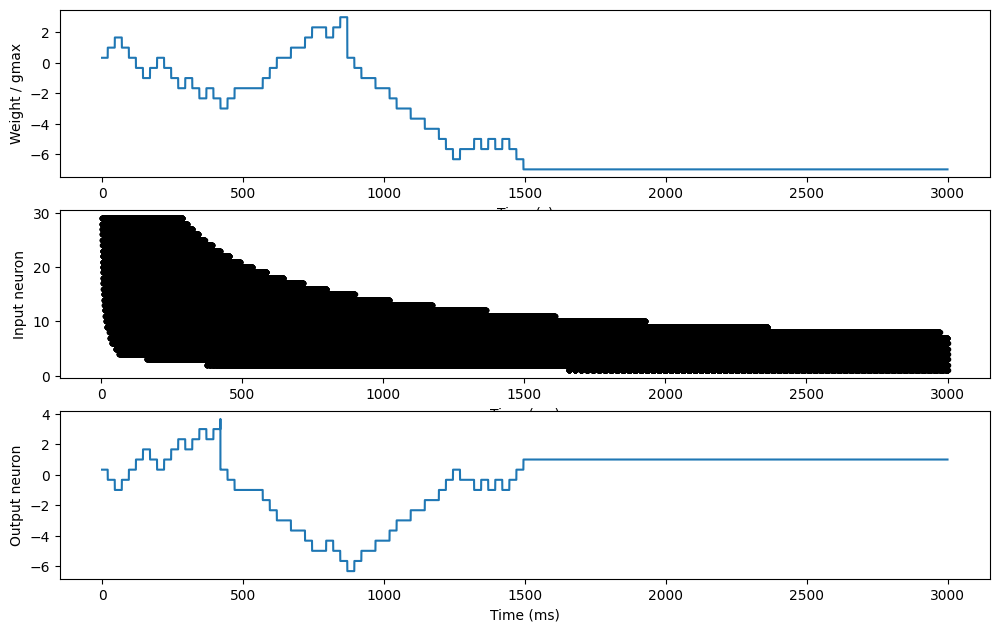

In [29]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(mond1.t/b2.ms, mond1.v.T/gmax)
plt.xlabel('Time (s)')
plt.ylabel('Weight / gmax')
plt.subplot(412)
plt.plot(mon_input.t/b2.ms, mon_input.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Input neuron')
#plt.yticks(range(0,len(input_rates)))
plt.subplot(413)
plt.plot(mond2.t/b2.ms, mond2.v.T/gmax)
plt.xlabel('Time (ms)')
plt.ylabel('Output neuron')
#plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import snntorch as snn
import snntorch.spikegen as spikegen

# Определение класса ResonateAndFireNeuron
class ResonateAndFireNeuron(snn.Leaky):
    def __init__(self, beta, w, b, val, spike_grad=snn.Tanh()):
        super(ResonateAndFireNeuron, self).__init__(beta=beta, spike_grad=spike_grad)
        self.w = w
        self.b = b
        self.val = val

    def forward(self, x):
        mem, spk, syn = super().forward(x)
        
        mem = self.b * mem - self.w * spk
        mem = mem + self.val * x

        return mem, spk, syn


class SimpleResonateAndFireNetwork(nn.Module):
    def __init__(self):
        super(SimpleResonateAndFireNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Для MNIST
        self.lif1 = ResonateAndFireNeuron(beta=0.5, spike_grad=snn.Tanh())
        self.fc2 = nn.Linear(128, 10)
        self.lif2 = ResonateAndFireNeuron(beta=0.5, spike_grad=snn.Tanh())
        
    def forward(self, x):
        x = self.fc1(x)
        mem1, spk1, syn1 = self.lif1(x)
        x = self.fc2(spk1)
        mem2, spk2, syn2 = self.lif2(x)
        return spk2

# Функция обучения с использованием суррогатного градиента
def train(network, device, loader, optimizer, criterion):
    network.train()
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = network(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

# Пример использования
if __name__ == "__main__":
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    network = SimpleResonateAndFireNetwork().to(device)
    optimizer = torch.optim.Adam(network.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    
    # Загрузчик данных (например, MNIST)
    from torchvision import datasets, transforms
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
    
    for epoch in range(10):  # Пример обучения на 10 эпох
        train(network, device, trainloader, optimizer, criterion)
        print(f"Эпоха {epoch+1}, потеря: {criterion(network(trainloader.dataset.data.to(device)), trainloader.dataset.targets.to(device))}")

In [69]:
print(np.std(df0x[0]))

0.08886526


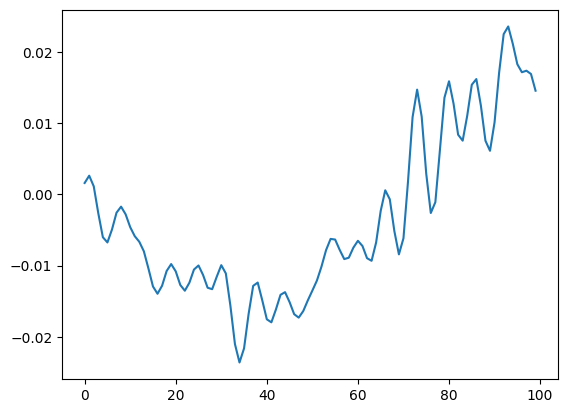

In [ ]:
plt.plot(audio_array[:100])
plt.show()

In [ ]:
print(label)

6


In [ ]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

Y=np.copy(audio_array)
X=np.arange(len(Y))
# Выполняем быстрое преобразование Фурье (FFT)
Y_fft = fft(Y)

# Находим частоты, соответствующие спектру
freq = fftfreq(len(X), d=X[1]-X[0])  # d - шаг по времени

#peaks = np.where(np.abs(Y_fft) > 0.7 * np.max(np.abs(Y_fft)))
peaks, _ = find_peaks(np.abs(Y_fft), height=0.5)
peaks=peaks[freq[peaks]>=0]

# Частоты и амплитуды сигнала
frequencies = freq[peaks]
amplitudes = 2*np.abs(Y_fft[peaks]) / len(X)

print("Частоты:")
print(frequencies)
print("Амплитуды:")
print(amplitudes)

Частоты:
[0.00066607 0.00155417 0.00244227 0.00333037 0.00399645 0.00577265
 0.0062167  0.0071048  0.00777087 0.00821492 0.00888099 0.00954707
 0.00999112 0.01065719 0.01154529 0.01243339 0.01287744 0.01332149
 0.01398757 0.01443162 0.01487567 0.01554174 0.01620782 0.01665187
 0.01731794 0.01798401 0.01865009 0.01953819 0.02020426 0.02109236
 0.02175844 0.02242451 0.02331261 0.02420071 0.02486679 0.02619893
 0.02708703 0.02819716 0.02908526 0.03019538 0.03108348 0.03219361
 0.03263766 0.03308171 0.03463588 0.03530195 0.03596803 0.03685613
 0.0375222  0.03796625 0.0384103  0.03996448 0.04085258 0.04240675
 0.04418295 0.04484902 0.0455151  0.04773535 0.04862345 0.0499556
 0.05039964 0.05084369 0.05195382 0.05350799 0.05439609 0.05506217
 0.05639432 0.05683837 0.05728242 0.05772647 0.05817052 0.05883659
 0.05928064 0.06238899 0.06349911 0.06660746 0.06705151 0.06816163
 0.06860568 0.06904973 0.06971581 0.07238011 0.07349023 0.07393428
 0.07526643 0.0759325  0.07637655 0.07726465 0.0821492

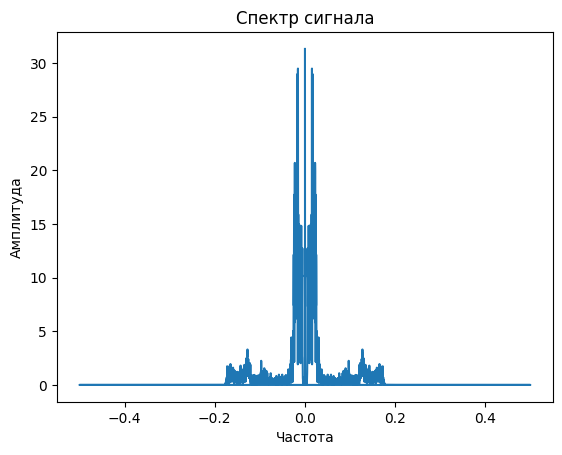

In [ ]:
plt.plot(freq, np.abs(Y_fft))
plt.title("Спектр сигнала")
plt.xlabel("Частота")
plt.ylabel("Амплитуда")
plt.show()

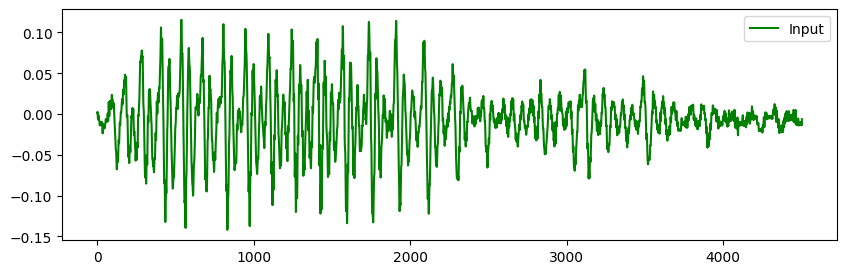

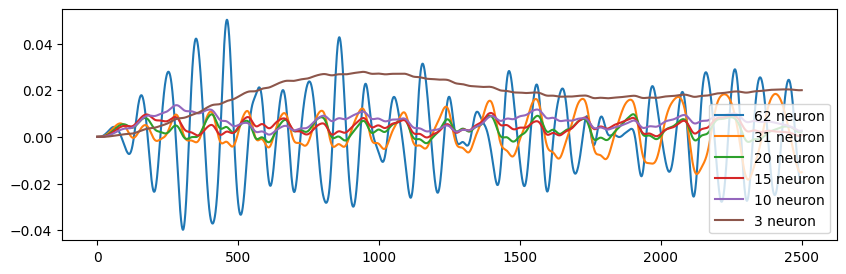

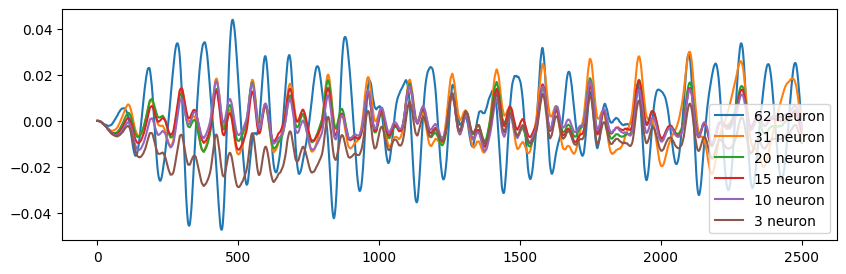

In [ ]:
find_freaq(X,Y)